# SNAKE BREED CLASSIFICATION

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from IPython.display import Image
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Creating the data
First and foremost we will get the image paths and by converting the labels into numbers combine in one array and then resizing the images in a way which is understandable by the Machine and Deep learning model.

### About the data
* The data is downloaded from the kaggle website `https://www.kaggle.com/datasets/oossiiris/hackerearth-deep-learning-identify-the-snake-breed`.
* The data is divided in two parts image and labels (csv) files and it is present in the different sets i.e. train and test sets.

## Procedure
* First we will form a array of paths by combining and images and it's label in ONE.
* We will find the unique label in the labels of a each image and convert them in boolean value `True and False`.
* As the models don't understand the string values, we will have to convert the boolean labels into number i.e. `1's and 0's`.
* Then we will process the image into different size.

## Getting the data

In [ ]:
labels_csv = pd.read_csv("drive/MyDrive/Snake Breed/train.csv")
labels_csv.head(10)

image_id                    breed
0  a8b3ad1dde    nerodia-erythrogaster
1  8b492b973d    pantherophis-vulpinus
2  929b99ea92      thamnophis-sirtalis
3  bbac7385e2   pantherophis-obsoletus
4  ef776b1488   agkistrodon-contortrix
5  d04b95dd67      thamnophis-sirtalis
6  190317f717           crotalus-atrox
7  43e4eb5f81  lampropeltis-triangulum
8  4fd6a5e5fa        crotalus-horridus
9  a57df436ac           crotalus-ruber

In [ ]:
len(labels_csv)

5508

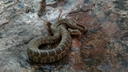

In [ ]:
Image("drive/MyDrive/Snake Breed/dataset/train/a8b3ad1dde.jpg")

In [ ]:
labels_csv["breed"][0]

'nerodia-erythrogaster'

In [ ]:
filenames = ["drive/MyDrive/Snake Breed/dataset/train/"+ fname+ ".jpg" for fname in labels_csv["image_id"]]
filenames[:10]

['drive/MyDrive/Snake Breed/dataset/train/a8b3ad1dde.jpg',
 'drive/MyDrive/Snake Breed/dataset/train/8b492b973d.jpg',
 'drive/MyDrive/Snake Breed/dataset/train/929b99ea92.jpg',
 'drive/MyDrive/Snake Breed/dataset/train/bbac7385e2.jpg',
 'drive/MyDrive/Snake Breed/dataset/train/ef776b1488.jpg',
 'drive/MyDrive/Snake Breed/dataset/train/d04b95dd67.jpg',
 'drive/MyDrive/Snake Breed/dataset/train/190317f717.jpg',
 'drive/MyDrive/Snake Breed/dataset/train/43e4eb5f81.jpg',
 'drive/MyDrive/Snake Breed/dataset/train/4fd6a5e5fa.jpg',
 'drive/MyDrive/Snake Breed/dataset/train/a57df436ac.jpg']

In [ ]:
# Check if the filenames matches to the train data
if len(os.listdir("drive/MyDrive/Snake Breed/dataset/train")) == len(filenames):
  print("The filenames matches the number of data in the train")
else:
  print("Please check the directory again the number of filenames and labels doesn't match")

The filenames matches the number of data in the train


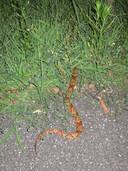

In [ ]:
Image(filenames[100])

In [ ]:
Image(filenames[100])
labels_csv["breed"][100]

'agkistrodon-contortrix'

In [ ]:
labels_csv["breed"][0]

'nerodia-erythrogaster'

In [ ]:
# Converting the labels to array
labels = labels_csv["breed"].to_numpy()
labels[:10]

array(['nerodia-erythrogaster', 'pantherophis-vulpinus',
       'thamnophis-sirtalis', 'pantherophis-obsoletus',
       'agkistrodon-contortrix', 'thamnophis-sirtalis', 'crotalus-atrox',
       'lampropeltis-triangulum', 'crotalus-horridus', 'crotalus-ruber'],
      dtype=object)

In [ ]:
# Check if the labels match the filenames length
if len(labels)  == len(filenames):
  print("It matches and you can proceed")
else:
  print("Doesn't matches please check again")

It matches and you can proceed


In [ ]:
# Find the total unique breeds
unique_breeds = np.unique(labels)
len(unique_breeds)

35

In [ ]:
# Getting the boolean value of first labels
labels[0]
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [ ]:
# Now the data is ready, we have to convert it into numbers by first converting it into boolean values then into 1's and 0's
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False])]

In [ ]:
# Converting the boolean_labels to number
print(labels[0]) # Getting the label at first index
print(np.where(unique_breeds == labels[0])) # Getting the index where the breed is found
print(boolean_labels[0].argmax()) # Getting the index where the label is found
print(boolean_labels[0].astype(int))

nerodia-erythrogaster
(array([15]),)
15
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Creating the Validation Set

In [ ]:
# Set X and y
X = filenames
y = boolean_labels

In [ ]:
NUM_IMAGES = 1000 #@param {type: "slider", min:1000, max:5000, step:500}

In [ ]:
# Splitting the data in train and validation
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [ ]:
# Let's geez the train and val data
X_train[:4], y_train[:2]

(['drive/MyDrive/Snake Breed/dataset/train/054ac263b9.jpg',
  'drive/MyDrive/Snake Breed/dataset/train/6dab454abd.jpg',
  'drive/MyDrive/Snake Breed/dataset/train/9fc4eea060.jpg',
  'drive/MyDrive/Snake Breed/dataset/train/7733593590.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False]),
  array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False,  True, False])])

## Preprocessing the image (turning them into numbers)
1. We will store the path of the image.
2. We will use tensorflow to read and store the image in variable `image`.
3. Convert the image in tensors.
4. Resize the image to (224, 224)
5. Return the image

In [ ]:
# filenames[42]
image = imread(filenames[42])
image.shape

(96, 128, 3)

In [ ]:
image

array([[[ 78,  69,  60],
        [119, 115, 103],
        [159, 162, 143],
        ...,
        [169, 169, 143],
        [158, 151, 123],
        [145, 136, 107]],

       [[ 74,  61,  52],
        [104,  98,  84],
        [153, 156, 135],
        ...,
        [131, 131, 107],
        [138, 132, 106],
        [164, 157, 129]],

       [[152, 134, 124],
        [105,  93,  79],
        [119, 121,  99],
        ...,
        [114, 113,  92],
        [ 64,  59,  37],
        [ 99,  93,  69]],

       ...,

       [[101,  99,  76],
        [ 72,  72,  44],
        [123, 127,  94],
        ...,
        [ 83,  84,  50],
        [ 93,  92,  64],
        [ 90,  88,  63]],

       [[ 86,  78,  59],
        [102, 100,  77],
        [ 98, 105,  74],
        ...,
        [ 87,  91,  56],
        [108, 109,  78],
        [ 81,  81,  53]],

       [[ 75,  63,  47],
        [117, 112,  92],
        [ 51,  60,  31],
        ...,
        [103, 107,  72],
        [119, 122,  91],
        [ 92,  95,  64]]

In [ ]:
image.max(), image.min()

(255, 2)

In [ ]:
tf.constant(image)

<tf.Tensor: shape=(96, 128, 3), dtype=uint8, numpy=
array([[[ 78,  69,  60],
        [119, 115, 103],
        [159, 162, 143],
        ...,
        [169, 169, 143],
        [158, 151, 123],
        [145, 136, 107]],

       [[ 74,  61,  52],
        [104,  98,  84],
        [153, 156, 135],
        ...,
        [131, 131, 107],
        [138, 132, 106],
        [164, 157, 129]],

       [[152, 134, 124],
        [105,  93,  79],
        [119, 121,  99],
        ...,
        [114, 113,  92],
        [ 64,  59,  37],
        [ 99,  93,  69]],

       ...,

       [[101,  99,  76],
        [ 72,  72,  44],
        [123, 127,  94],
        ...,
        [ 83,  84,  50],
        [ 93,  92,  64],
        [ 90,  88,  63]],

       [[ 86,  78,  59],
        [102, 100,  77],
        [ 98, 105,  74],
        ...,
        [ 87,  91,  56],
        [108, 109,  78],
        [ 81,  81,  53]],

       [[ 75,  63,  47],
        [117, 112,  92],
        [ 51,  60,  31],
        ...,
        [103, 107,  72

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessign images
def process_image(image_path):
  """
  Takes and image file path and turns the image into a tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Creating a batch of images.
 First we will the image and convert it into tensor of tuples `(image, label)`

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label, processes the image and returns a type of (image, label)
  """
  image = process_image(image_path)
  return image, label

In [ ]:
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Create training data batches....")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [ ]:
# Creating training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Create training data batches....
Creating validation data batches....


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 35), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 35), dtype=tf.bool, name=None)))

In [ ]:
import matplotlib.pyplot as plt
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  plt.figure(figsize=(10, 10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.16078432, 0.2509804 , 0.14117648],
          [0.18739498, 0.27759105, 0.16778713],
          [0.229972  , 0.32016808, 0.21036416],
          ...,
          [0.52745086, 0.50392145, 0.45686263],
          [0.51176465, 0.48823524, 0.4411764 ],
          [0.5019608 , 0.4784314 , 0.43137258]],
 
         [[0.16414566, 0.25434175, 0.14453782],
          [0.18915568, 0.27935174, 0.16954784],
          [0.22917168, 0.31936777, 0.20956384],
          ...,
          [0.5332532 , 0.5097238 , 0.46266496],
          [0.5191676 , 0.49563822, 0.44857937],
          [0.5103642 , 0.48683476, 0.43977594]],
 
         [[0.1742297 , 0.26442578, 0.15462185],
          [0.19443779, 0.28463387, 0.17482994],
          [0.22677073, 0.3169668 , 0.20716289],
          ...,
          [0.5506602 , 0.5271308 , 0.48007196],
          [0.54137653, 0.5178471 , 0.4707883 ],
          [0.53557426, 0.51204485, 0.46498603]],
 
         ...,
 
         [[0.02016799, 0.04761897, 0.02016799],
          [0.03277

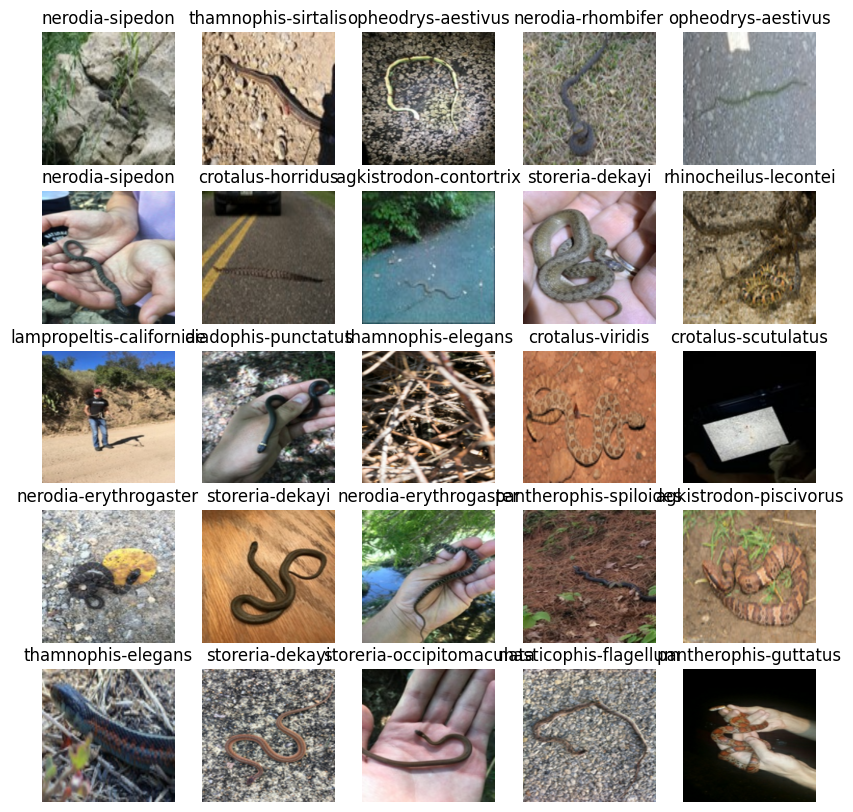

In [ ]:
show_25_images(train_images, train_labels)

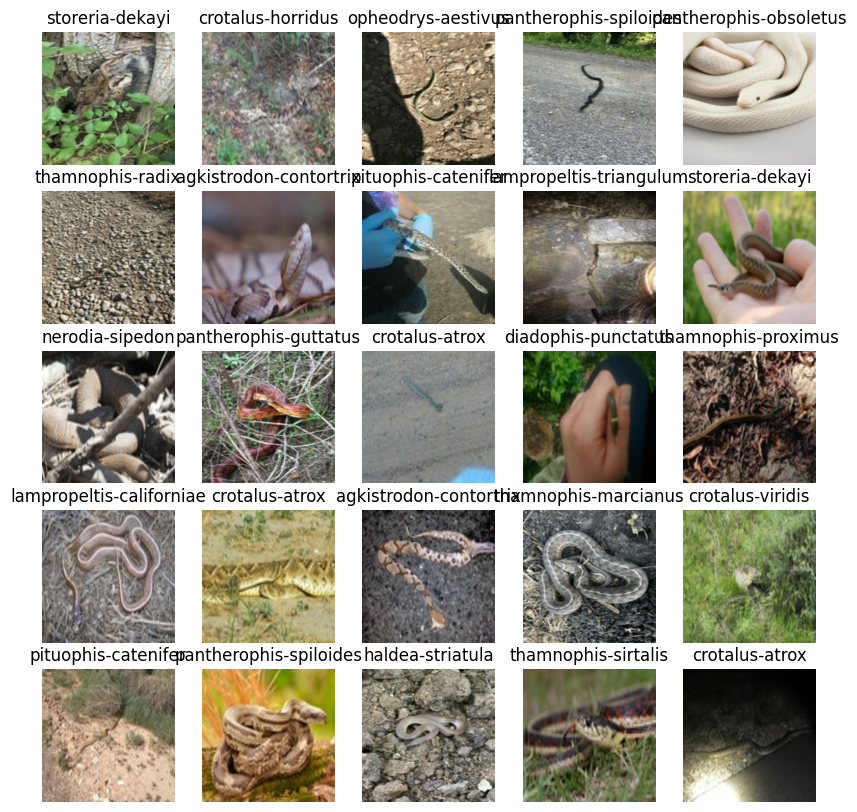

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [ ]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

OUTPUT_SHAPE = len(unique_breeds)

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax")
  ])

  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  model.build(INPUT_SHAPE)
  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 35)                35070     
                                                                 
Total params: 5467783 (20.86 MB)
Trainable params: 35070 (136.99 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  logdir = os.path.join("drive/MyDrive/Snake Breed/dataset/train/logs",
                        datetime.datetime.now().strftime("%Y%m%D-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [ ]:
NUM_EPOCHS = 100 #@param{type:"slider", min:10, max:100, step:10}

In [ ]:
print("GPU", "available (YES!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YES!!!)


In [ ]:
from tensorflow.python.eager.backprop import val_and_grad_function
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  model = create_model()

  tensorboard = create_tensorboard_callback()

  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  return model

In [ ]:
model = train_model()

Epoch 1/100
25/25 [==============================] - 116s 4s/step - loss: 4.0940 - accuracy: 0.1000 - val_loss: 3.5357 - val_accuracy: 0.1350
Epoch 2/100
25/25 [==============================] - 2s 65ms/step - loss: 2.7325 - accuracy: 0.2713 - val_loss: 3.2366 - val_accuracy: 0.2100
Epoch 3/100
25/25 [==============================] - 2s 98ms/step - loss: 2.0863 - accuracy: 0.4387 - val_loss: 3.1913 - val_accuracy: 0.2500
Epoch 4/100
25/25 [==============================] - 3s 108ms/step - loss: 1.6629 - accuracy: 0.5462 - val_loss: 3.2082 - val_accuracy: 0.2350
Epoch 5/100
25/25 [==============================] - 2s 99ms/step - loss: 1.3647 - accuracy: 0.6513 - val_loss: 3.2077 - val_accuracy: 0.2500
Epoch 6/100
25/25 [==============================] - 4s 142ms/step - loss: 1.1501 - accuracy: 0.7063 - val_loss: 3.2445 - val_accuracy: 0.2550
Epoch 7/100
25/25 [==============================] - 2s 66ms/step - loss: 0.9646 - accuracy: 0.7725 - val_loss: 3.2490 - val_accuracy: 0.2400
Epoc

In [ ]:
%tensorboard --logdir drive/MyDrive/Snake Breed/dataset/train/logs

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2023-12-21 18:37:14.263615: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 18:37:14.263713: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 18:37:14.265042: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 18:37:15.280955: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC] [--host ADDR]
                   [--bind_all] [--port PORT] [--reuse_port BOOL] [--load_f

In [ ]:
prediction = model.predict(val_data, verbose=1)

7/7 [==============================] - 19s 53ms/step


In [ ]:
 # Turn predictions probabilities into their respective label (easier to understand).
def get_pred_label(prediction_probabilities):
  """
  Turns any array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label =  get_pred_label(prediction[0])
pred_label

'nerodia-sipedon'

In [ ]:
# Unbatch the data
def unbatchify(data):
  """
  Unbatch the data and predict
  """
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels

(array([[[0.40784317, 0.3803922 , 0.30588236],
         [0.37002802, 0.34257704, 0.26806724],
         [0.30952382, 0.28207284, 0.20756304],
         ...,
         [0.770308  , 0.7624649 , 0.71512586],
         [0.7523809 , 0.7445378 , 0.6949579 ],
         [0.7411765 , 0.73333335, 0.68235296]],
 
        [[0.430611  , 0.40316004, 0.3286502 ],
         [0.40905863, 0.38160765, 0.30709785],
         [0.37457484, 0.34712386, 0.27261406],
         ...,
         [0.74627554, 0.7384324 , 0.6910934 ],
         [0.7587055 , 0.75086236, 0.7012825 ],
         [0.7664741 , 0.758631  , 0.7076506 ]],
 
        [[0.46556377, 0.43971467, 0.3603992 ],
         [0.4363677 , 0.41051862, 0.3312031 ],
         [0.389654  , 0.3638049 , 0.28448942],
         ...,
         [0.74300796, 0.738483  , 0.6910296 ],
         [0.7492554 , 0.7456458 , 0.6950362 ],
         [0.75316006, 0.7501226 , 0.6975403 ]],
 
        ...,
 
        [[0.4144169 , 0.42529756, 0.29748765],
         [0.40455362, 0.4204644 , 0.28482

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

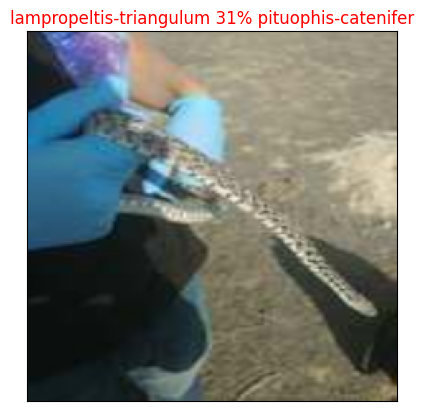

In [ ]:
plot_pred(prediction_probabilities=prediction,
          labels=val_labels,
          images=val_images,
          n=7)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  pred_label = get_pred_label(pred_prob)

  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  top_10_pred_values = pred_prob[top_10_pred_indexes]

  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")

  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

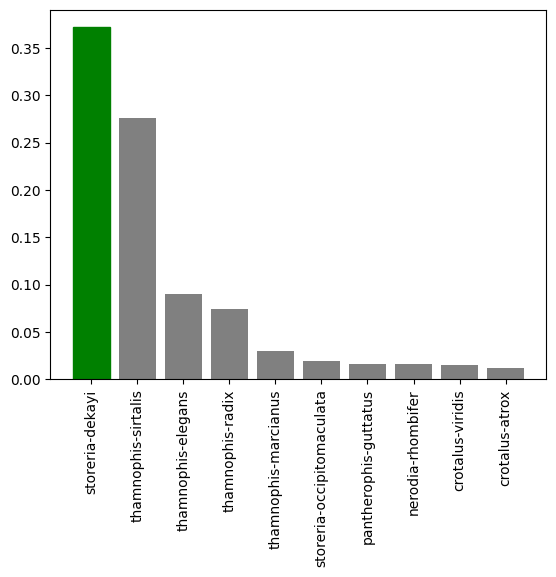

In [ ]:
plot_pred_conf(prediction_probabilities=prediction,
               labels=val_labels,
               n=9)

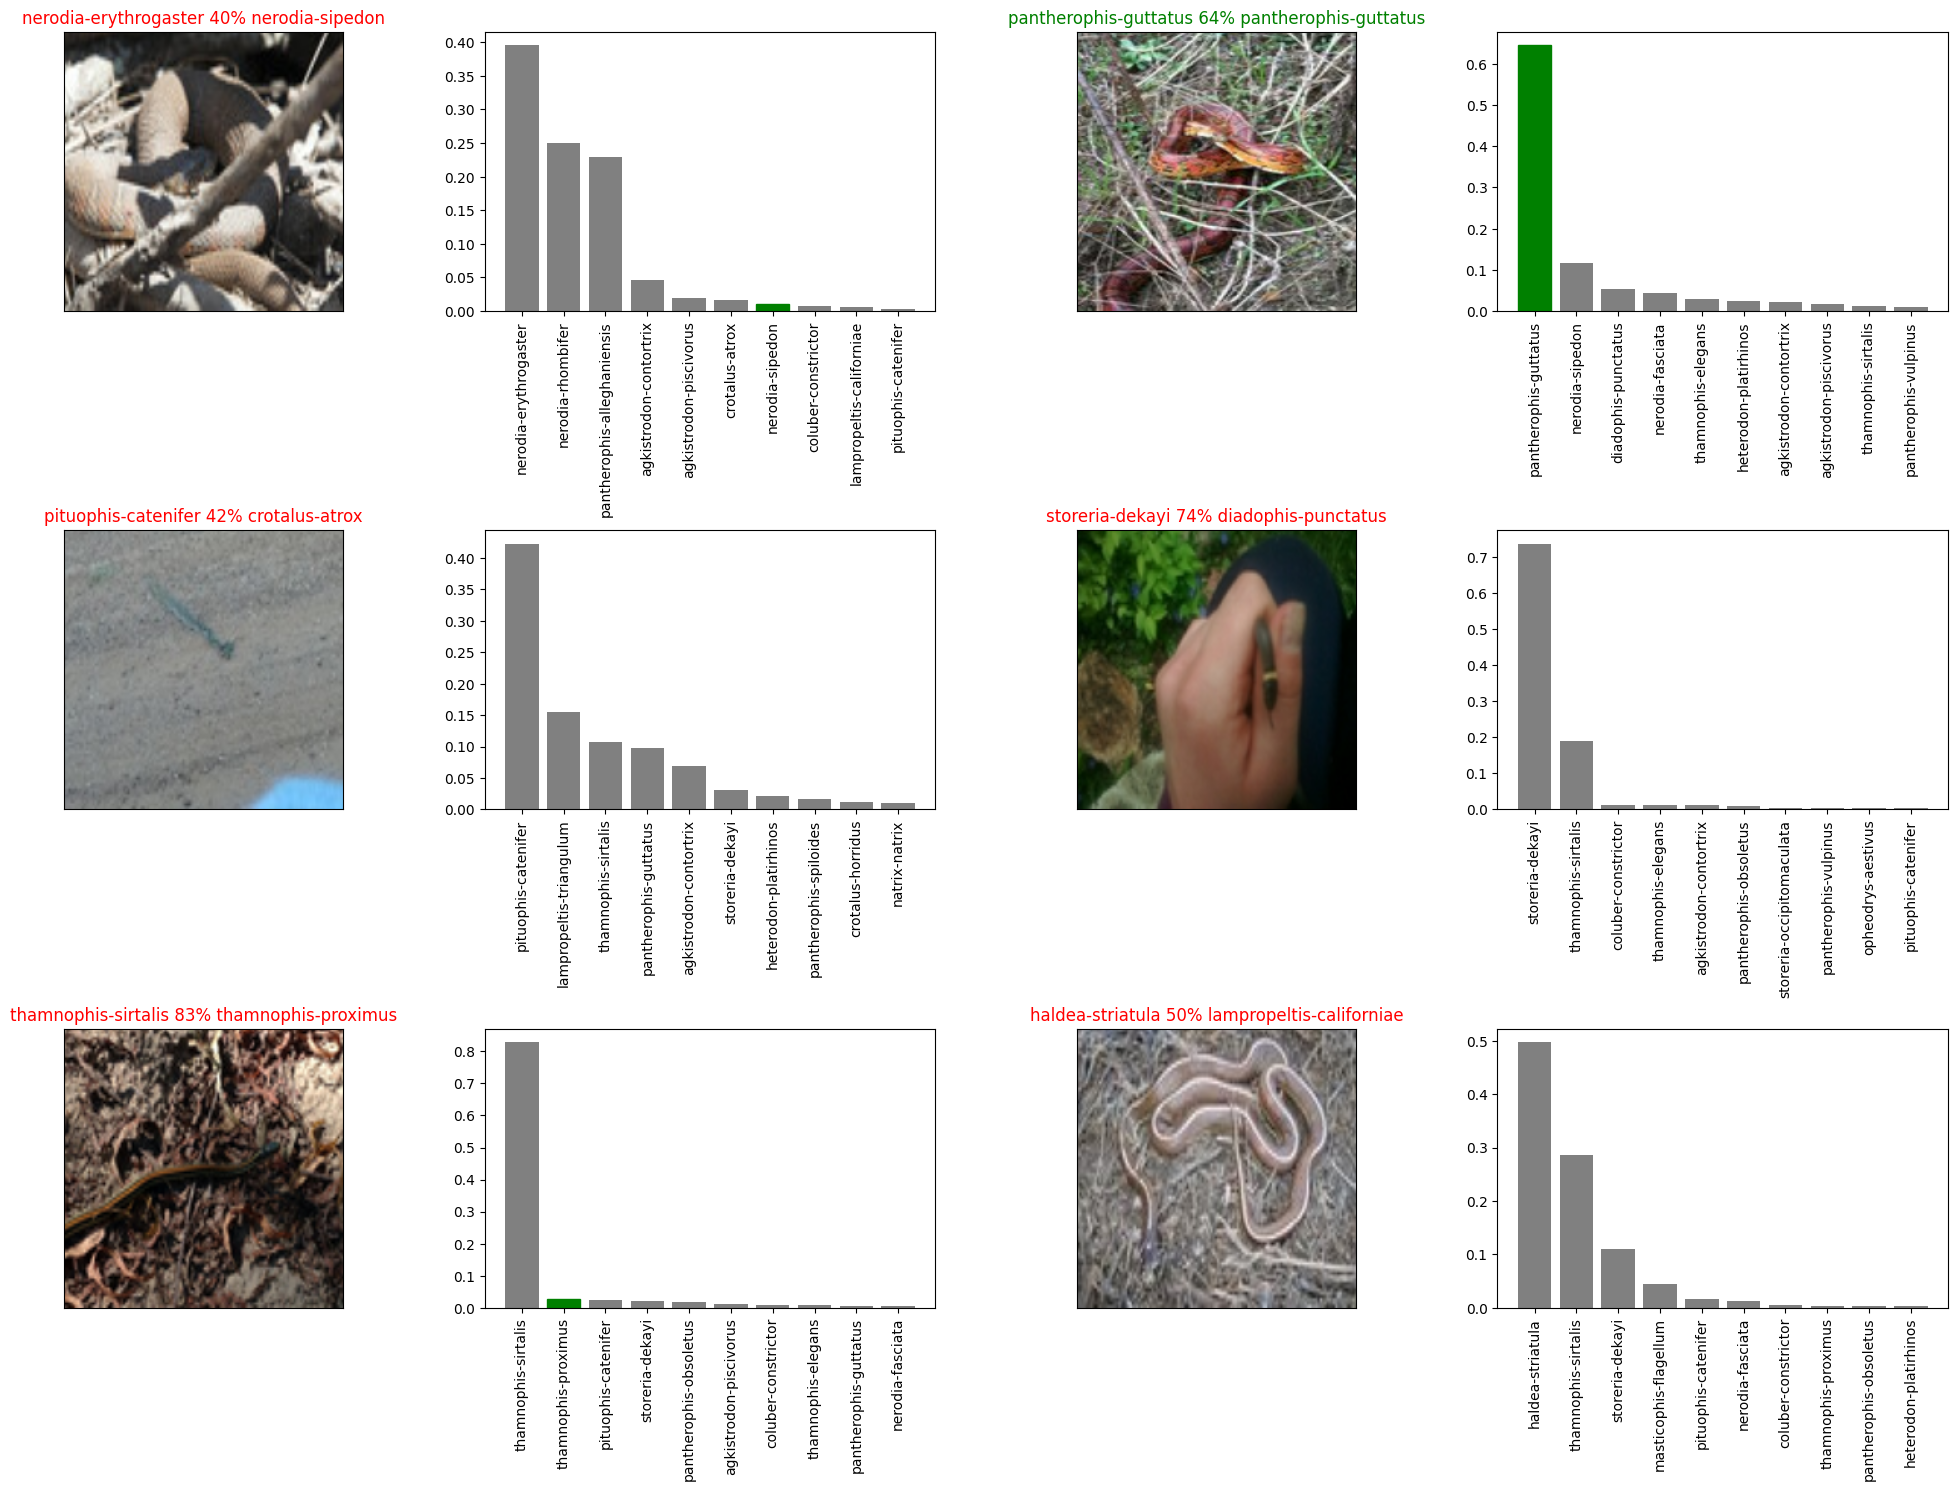

In [ ]:
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=prediction,
              labels=val_labels,
              images=val_images,
              n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=prediction,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory
  """
  modeldir = os.path.join("drive/MyDrive/Snake Breed/dataset/train/Model",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5"
  print(f"Saving Model to : {model_path}....")
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
save_model(model, suffix="Snake-breed-1000-images-mobilenietv2-Adam")

Saving Model to : drive/MyDrive/Snake Breed/dataset/train/Model/20231221-18511703184684-Snake-breed-1000-images-mobilenietv2-Adam.h5....


'drive/MyDrive/Snake Breed/dataset/train/Model/20231221-18511703184684-Snake-breed-1000-images-mobilenietv2-Adam.h5'

In [ ]:
loaded_1000_model = load_model("drive/MyDrive/Snake Breed/dataset/train/Model/20231221-18511703184684-Snake-breed-1000-images-mobilenietv2-Adam.h5")

Loading saved model from: drive/MyDrive/Snake Breed/dataset/train/Model/20231221-18511703184684-Snake-breed-1000-images-mobilenietv2-Adam.h5


In [ ]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)

Create training data batches....


In [ ]:
# Create a model for full model
full_model = create_model()

In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can;t monitor accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

In [ ]:
# Load in the full model
loaded_full_model = load_model('drive/My Drive/Data/models/20200131-03111580440309-all-images-Adam.h5')

In [ ]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "drive/MyDrive/Snake Breed/dataset/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

In [ ]:
# How many test images are there?
len(test_filenames)

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

In [ ]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

In [ ]:
# Append test image ID's to predictions DataFrame
test_path = "drive/MyDrive/Snake Breed/dataset/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

In [ ]:
preds_df.to_csv("drive/MyDrive/Snake Breed/dataset/full_submission_1_mobilienetV2_adam.csv",
                 index=False)

In [ ]:
# Get custom image filepaths
custom_path = "drive/MyDrive/Snake Breed/dataset/Snake/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
# Turn custom image into batch (set to test data because there are no labels)
custom_data = create_data_batches(custom_image_paths, test_data=True)

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)